<center> 
    
# Python For Quantum Mechanics
# Week 6: Scipy ODEs & PDEs

</center>

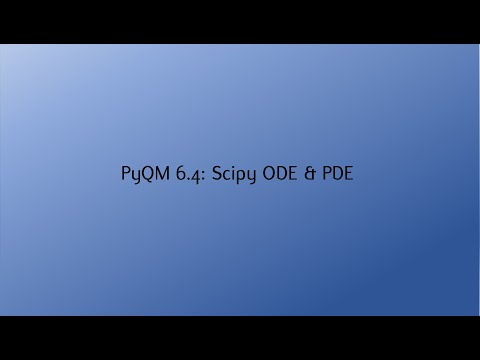

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('W6iLi9I90OM',width=700, height=400)

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


import numpy as np
import numpy.random as rnd

import scipy
from scipy import integrate

## Integration

The function `scipy.integrate.quad(f,a,b)` integrates a function `f(x)` between the bounds [`a`,`b`] using a technique from the Fortran library QUADPACK and returns the value `y` of the definite integral integral and the error in this calculation,
$$y = \int_a^b f(x)\ dx.$$

In [28]:
def f(x):
    return 2*x

For example for the above function $f(x) = 2x$ with the limits [$2$,$5$] we get,
$$y = \int_2^5 \left(2x\right)\ dx =  x^2 \bigg|_{x=2}^{x=5} = 5^2 - 2^2 = 21.$$
The integral, of course, gives the area under the curve.

Area = 21.0
Error = 2.3314683517128287e-13


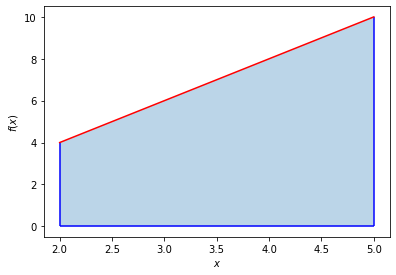

In [29]:
a = 2
b = 5

def_int, err = integrate.quad(f,a,b)

print('Area =',def_int)
print('Error =',err)

x = np.linspace(a,b,100)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,f(x),'r')

ax.vlines([a,b],[0,0],[f(a),f(b)],'b')
ax.hlines(0,a,b,'b')
ax.fill_between(x,f(x),alpha=0.3)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

The function `scipy.integrate.dblquad(g,a,b,c,d)` integrates a function `g(x,y)` between the bounds [`a`,`b`] in `x` and [`c`,`d`] in `y` using a technique from the Fortran library QUADPACK and returns the value `z` of the definite integral integral and the error in this calculation,
$$z = \int_c^d \int_a^b g(x,y)\ dx dy.$$

In [30]:
def g(x,y):
    return np.sqrt(x**2 + y**2 +16)

Area = 327.8820544699914
Error = 4.38526073264293e-09


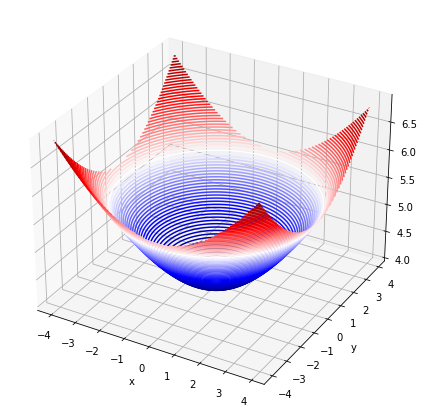

In [31]:
a = -4
b = 4
c = -4
d = 4

def_int, err = integrate.dblquad(g,a,b,c,d)

print('Area =',def_int)
print('Error =',err)


x = np.arange(a,b,0.1)
y = np.arange(c,d,0.1)


Xmesh,Ymesh = np.meshgrid(x, y)
Zmesh = g(Xmesh,Ymesh)

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,.8,.8],projection='3d')

ax.contour3D(Xmesh,Ymesh,Zmesh,90,cmap='seismic')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

The function `scipy.integrate.tplquad(h,a,b,c,d,e,f)` integrates a function `h(x,y,z)` between the bounds [`a`,`b`] in `x`, [`c`,`d`] in `y`, and [`e`,`f`] in `z` using a technique from the Fortran library QUADPACK and returns the value `k` of the definite integral and the error in this calculation,
$$k=\int_e^f \int_c^d \int_a^b h(x,y,z)\ dx dy dz.$$

In [32]:
def h(x,y,z):
    return np.sqrt(x**2 + y**2 +z**2 +16)

In [33]:
lower_bound = -4
upper_bound = 4

def_int, err = integrate.tplquad(h,lower_bound,upper_bound,lower_bound,upper_bound,lower_bound,upper_bound)

print('Area = ',def_int)
print('Error = ',err)

Area =  2872.0630239126044
Error =  8.054480129954428e-09


## Ordinary Differential Equations (ODEs)

A first order ODE is an equation of the form
$$\frac{dy}{dt} = f(t,y). $$
Lets do an example of radioactive decay, and how we can use scipy to solve an ode. 

The half life of carbon-14 is 5700 years. It's corrseponding decay constant is given by the formula
$$k = \frac{ln(\frac{1}{2})}{5700} = -0.0001216$$
We can write an ordinary differential equation that encapsulates radioactive, exponential decay as follows
$$\frac{dy}{dt} = k*y $$
Lets solve this, for an initial $100$g sample of carbon-14, using `scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)`. This solves an ODE, given an initial value `y0`, over a time span `t_span`, where the right hand side of the above equation is given by `fun`. The method of integration is set to fourth-order Runge-Kutta by default. `t_eval` can be set to an array that specifies the times at which to store the solution, otherwise this is set by default. The function returns multiple attributes, most importantly `.t` and `.y` which give the stored times and $y$-values for the solution.

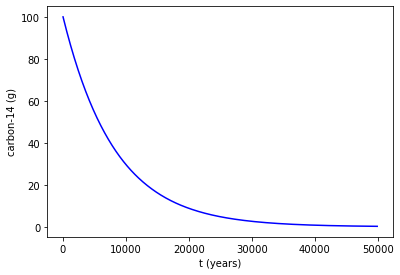

In [34]:
k = -0.0001216

def exponential_decay(t, y): 
    return k * y

t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100], t_eval=t)

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b')
ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

We can also solve for multiple initial values of `y`, in other words that `y0` can be an array. Here we have solution for $100$g, $50$g, and $10$g of carbon-14.

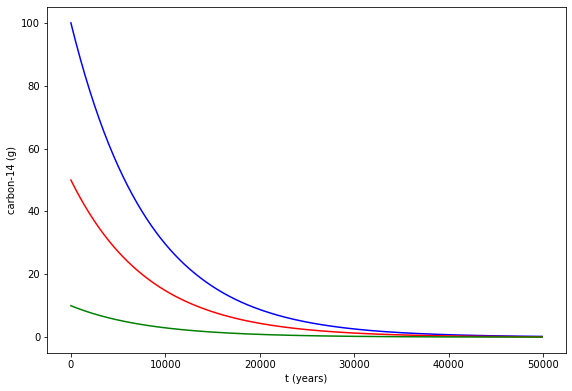

In [35]:
k = -0.0001216

def exponential_decay(t, y): return k * y

t = np.arange(0,50000,100)
sol = integrate.solve_ivp(exponential_decay, [0, 50000], [100,50,10], t_eval=t)

fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(sol.t,sol.y[0,:],'b',label = '$100$g')
ax.plot(sol.t,sol.y[1,:],'r',label = '$50$g')
ax.plot(sol.t,sol.y[2,:],'g',label = '$10$g')

ax.set_xlabel('t (years)')
ax.set_ylabel('carbon-14 (g)')

plt.show()

## Finite-Difference Method

### Taylor's Theorem

The taylor series allows us to approximate derivatives, particularly in a discrete step-wise manner. We will leverage this to our advantage, greatly simplifying integral and derivative problems.

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2  + ... + \frac{f^{(n)}(x_0)}{n!}h^n + R_n(x) $$

Lets start by truncating the series at $n=1$, assuming that the remainder $R_1(x)$ can be neglected.

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h $$

$$\implies f'(x_0) \approx \frac{f(x_0 + h)-f(x_0)}{h} $$

Thus we have an approximation for the first derivative over a discrete step $h$.

### The Laplace Operator

Lets do the something similar for the second derivative

$$f(x_0 + h) \approx f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$
$$f(x_0 - h) \approx f(x_0) - \frac{f'(x_0)}{1!}h + \frac{f''(x_0)}{2!}h^2 $$

Adding these two equations gives 

$$f''(x_0) \approx \frac{f(x_0 - h) -2f(x_0) + f(x_0 + h)}{h^2} $$

This is known as the Central-Difference Approximation.

Suppose we have six discrete values of a function $f$ inside some array/vector

$$f(x) = \begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix} $$

We can transform this vector, multiplying by some matrix, that finds the second derivative at each discrete point $f_i$ using the above approximation.

$$\begin{bmatrix}f^{''}_0 \\ f^{''}_1 \\ f^{''}_2 \\ f^{''}_3 \\ f^{''}_4 \\ f^{''}_5 \end{bmatrix} = \frac{1}{h^2}\begin{bmatrix}-2 & 1 & 0 & 0 & 0 &0\\ 1 & -2 & 1 & 0 & 0 &0\\ 0 &1 & -2 & 1 & 0 &0 \\ 0& 0 &1 & -2 & 1 &0 \\ 0 & 0& 0 &1 & -2&1\\0 & 0 & 0& 0 &1 & -2 \end{bmatrix}\begin{bmatrix}f_0 \\ f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5 \end{bmatrix}$$

Where $h$ is the spacing between discrete inputs to $f$.

We will call this matrix/operator the Laplace Operator and label it as $\textbf{L}$, so that for $n$ discrete values of a function

$$\frac{\partial{}^2}{\partial{x^2}} =  \textbf{L} = \frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & 0 & & \cdots & & 0 \\ 
1 & -2 & 1 & 0 & & \cdots \\ 
0 & 1 & -2 & & & & & \vdots \\
0 & 0 & & \ddots & \ddots \\
& & & \ddots & \ddots & & 0 & 0 \\
\vdots & \vdots & & & & -2 & 1 & 0 \\ 
& & & & 0 & 1 & -2 & 1 \\ 
0 & & \cdots & & 0 & 0 & 1 & -2 \\
\end{bmatrix}
$$

Notice, that we can classify this as a sparse matrix, and leverage this using scipy.

Lets test this on $\frac{x^3}{6}$, where $\frac{d^2}{dx^2}\frac{x^3}{6}=x$

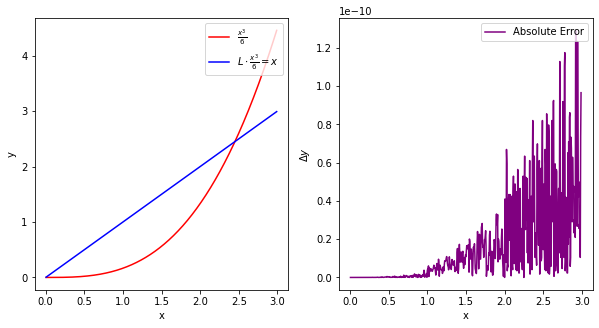

In [4]:
h = 0.005
x = np.arange(0, 3, h)
size = x.size

L = scipy.sparse.diags([1, -2, 1],[-1, 0, 1],shape=(size,size))/h**2

Error = abs(x[1:-1]-L.dot((x**3)/6)[1:-1])

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(x[1:-1], ((x**3)/6)[1:-1], label=r"$\frac{x^3}{6}$",color="red")
ax1.plot(x[1:-1], L.dot(((x**3)/6))[1:-1], label=r"$L \cdot \frac{x^3}{6} = x$",color="blue")
ax1.legend(loc=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax2.plot(x[1:-1],Error,label="Absolute Error",color="purple")
ax2.legend(loc=1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$\Delta y$")

plt.show()

## Partial Differential Equations (PDEs)

### The Schrödinger Equation

Lets use the above function to solve a PDE, namely the time-independent Schrödinger equation in one-dimension:
$$\frac{-\hbar^2}{2m}\frac{\partial{}^2}{\partial{x^2}}\psi(t,x) + V(x)\psi(t,x) = i\hbar \frac{\partial{}}{\partial{t}}\psi(t,x) $$

We can rewrite this equation in the following way
$$i\hbar\frac{\partial{}}{\partial{t}}\psi(t,i) = \left[\frac{-\hbar^2}{2m}\textbf{L} + V(i)\right]\psi(t,i) $$
Where $x\rightarrow i$ is interpreted as discretising the problem. We have thus reduced the problem to an ODE, as seen above. 

Let's investigate, and solve the problem, with various potentials $V(x)$.

#### The Quantum Harmonic Osciallator

$$V(x) = \frac{1}{2}m\omega^2(x-a)^2 $$

$$\omega = \frac{2\pi}{T} $$

Where $\omega$ is the angular frequency of the oscillator, and $T$ is it's period, $m$ is the mass. $a$ is the centre of oscialltion. 

For ease, $m=\hbar=T=1 \implies \omega = 2\pi$ and

$$V(x) = 2\pi^2(x-a)^2$$

In [7]:
#Initialise the discrete spatial points, x, into an array
h = 0.005
x = np.arange(-10, 10, h)
size = x.size

#Define the Laplace Operator
L = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

#Initialise the parameter values and potential V
hbar = 1 
m = 1
w = 2*np.pi
a = 0    
V = 0.5*m*(w**2)*(x-a)**2

#Define the function to be integrated
def wave_fun(t, psi):
    return -1j*(-(hbar/(2*m))*L.dot(psi) + (V/hbar)*psi)

# Time range for integration     
t_eval = np.arange(0.0, 1.0, h) 

We will define our initial state $\psi(t=0)$ as that of a wave packet scene in the previous section 6.4

$$\psi(x) = \frac{1}{(\pi \sigma^2)^{\frac{1}{4}}}e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{ifx} $$

Where $\sigma$ is the width, $x_0$ is it's position, and $f$ is it's frequency.

In [8]:
#Defining the initial state psi
f = 8*(2*np.pi)
sigma = 1.0 
x0 = a
packet = (1.0/np.sqrt(sigma*np.sqrt(np.pi)))*np.exp(-(x-x0)**2/(2.0*sigma**2))*np.exp(1j*f*x)

#Normalise
packet = packet/(np.sqrt(sum((abs(packet))**2)))

We will now solve using 
```scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45',t_eval=None)```

In [9]:
sol = integrate.solve_ivp(wave_fun, t_span = [0, 1], y0 = packet, t_eval = t_eval)

Now lets plot

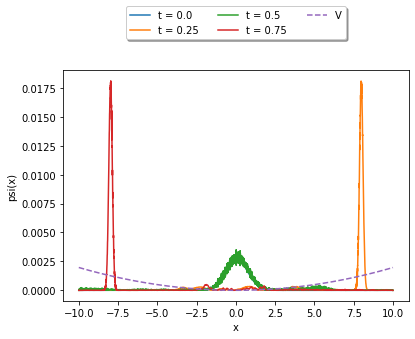

In [10]:
#Plot the result at different times
fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

for i, t in enumerate(sol.t):
    if i%50==0:
        ax.plot(x, np.abs(sol.y[:,i])**2,label='t = {}'.format(t)) 

#Plot the potential, adjusting size for visual aid
ax.plot(x, V*0.000001, "--", label='V')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)

ax.set_xlabel('x')
ax.set_ylabel('psi(x)')
plt.show()

<IPython.core.display.Javascript object>


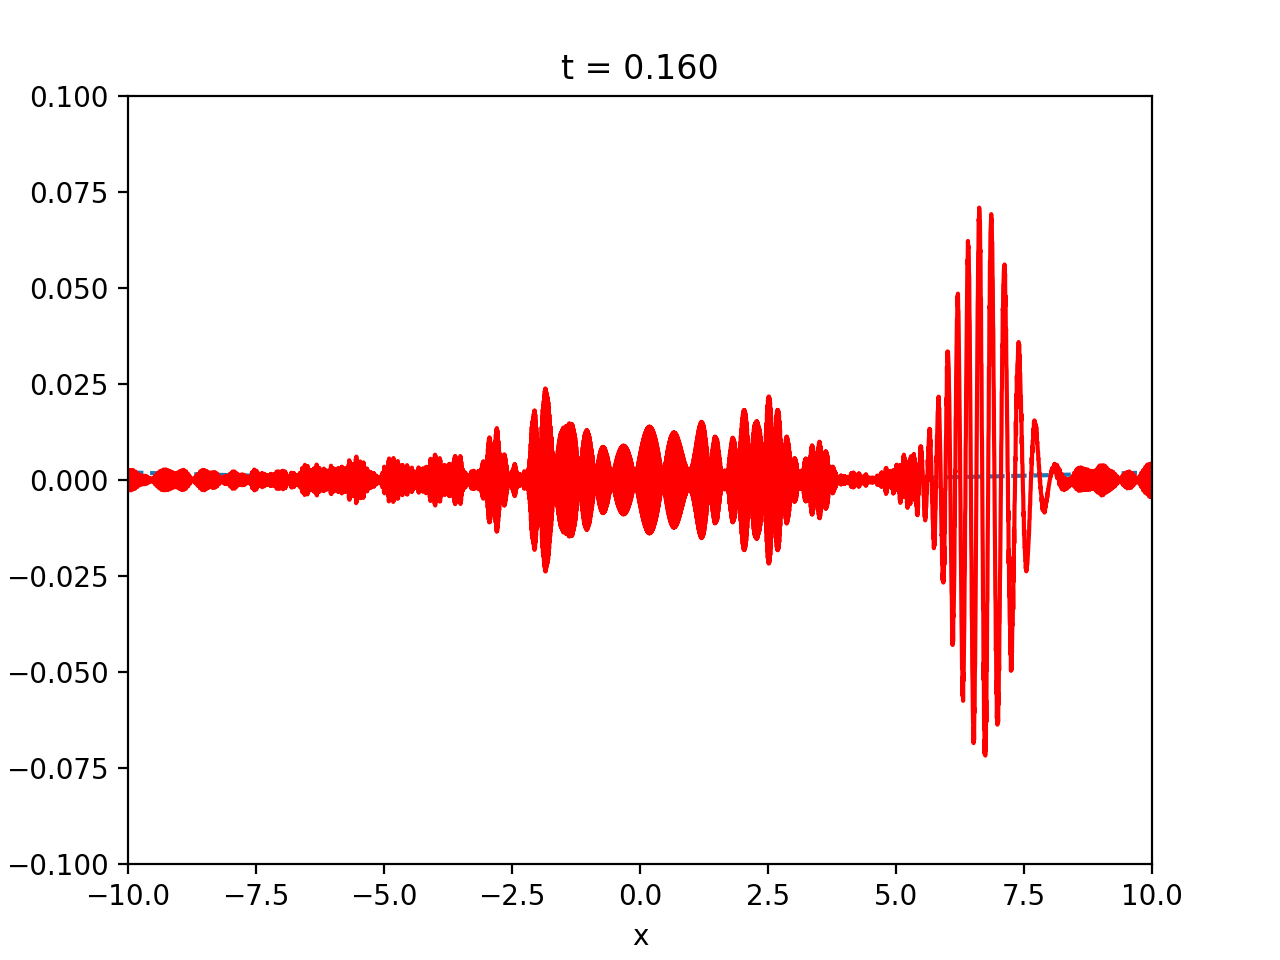

In [43]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_axes([.1,.1,.8,.8])

ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('psi(x)')

title = ax1.set_title('The Quantum Harmonic Osciallator')

line1, = ax1.plot([], [], "--")
line2, = ax1.plot([], [],color='red')


def init():
    line1.set_data(x, V*0.000001)
    return line1,


def animate(i):
    line2.set_data(x, sol.y[:,i])
    title.set_text('t = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)

plt.show()

##### Fourier Transform

<IPython.core.display.Javascript object>


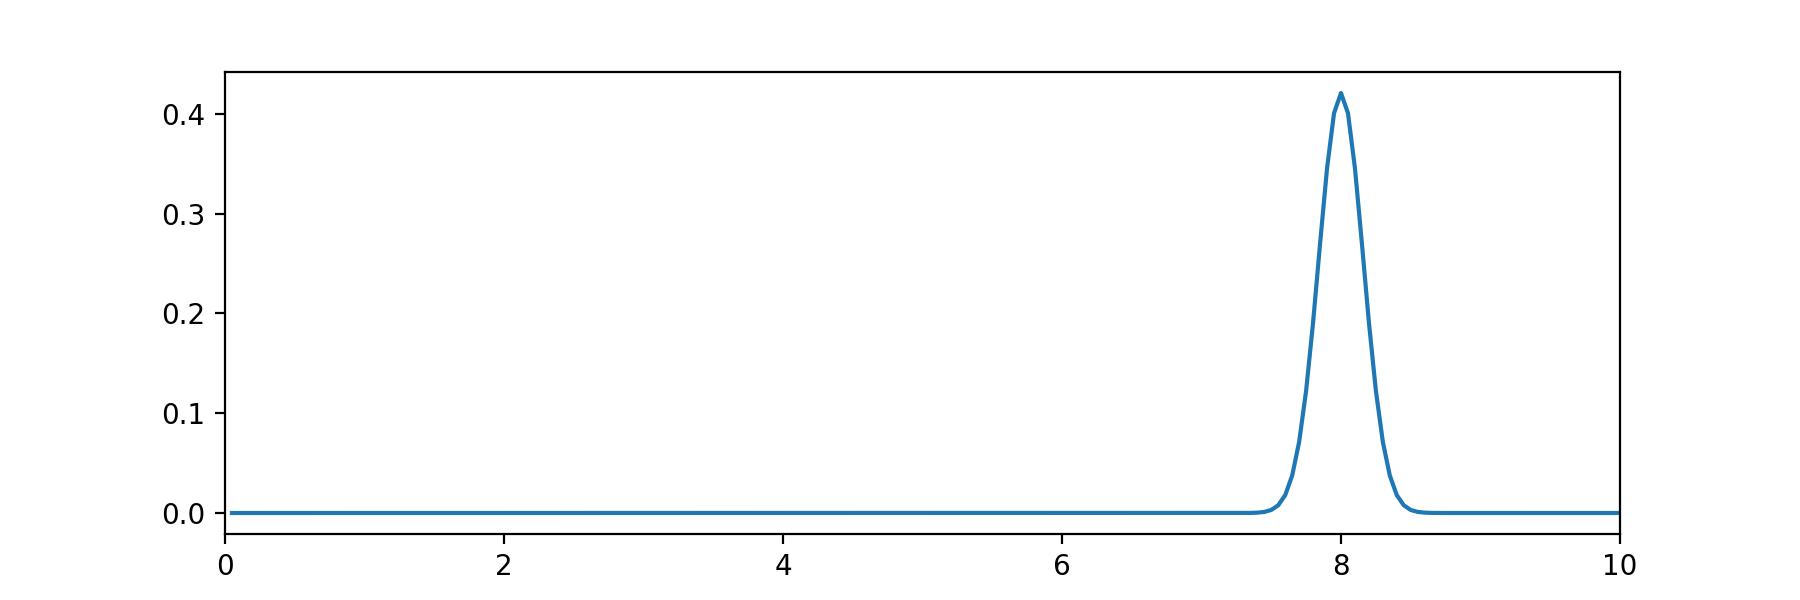

In [44]:
from numpy.fft import fftfreq
from scipy import fftpack


F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)
F = F/(np.sqrt(sum((abs(F))**2)))

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10);

In [45]:
F = np.zeros(shape=(size,sol.y.size),dtype='complex')
w = fftfreq(size, h)


for i, t in enumerate(sol.t):
    F[:,i] = fftpack.fft(sol.y[:,i])
    F[:,i] = F[:,i]/(np.sqrt(sum((abs(F[:,i])**2))))
    sol.y[:,i] = sol.y[:,i]/(np.sqrt(sum((abs(sol.y[:,i])**2))))

print(np.sqrt(sum((abs(F[:,i])**2))))
print(np.sqrt(sum((abs(sol.y[:,i])**2))))

1.0000000000000013
0.999999999999998


(0.12615662610102787+9.912719241054443e-12j)


<IPython.core.display.Javascript object>


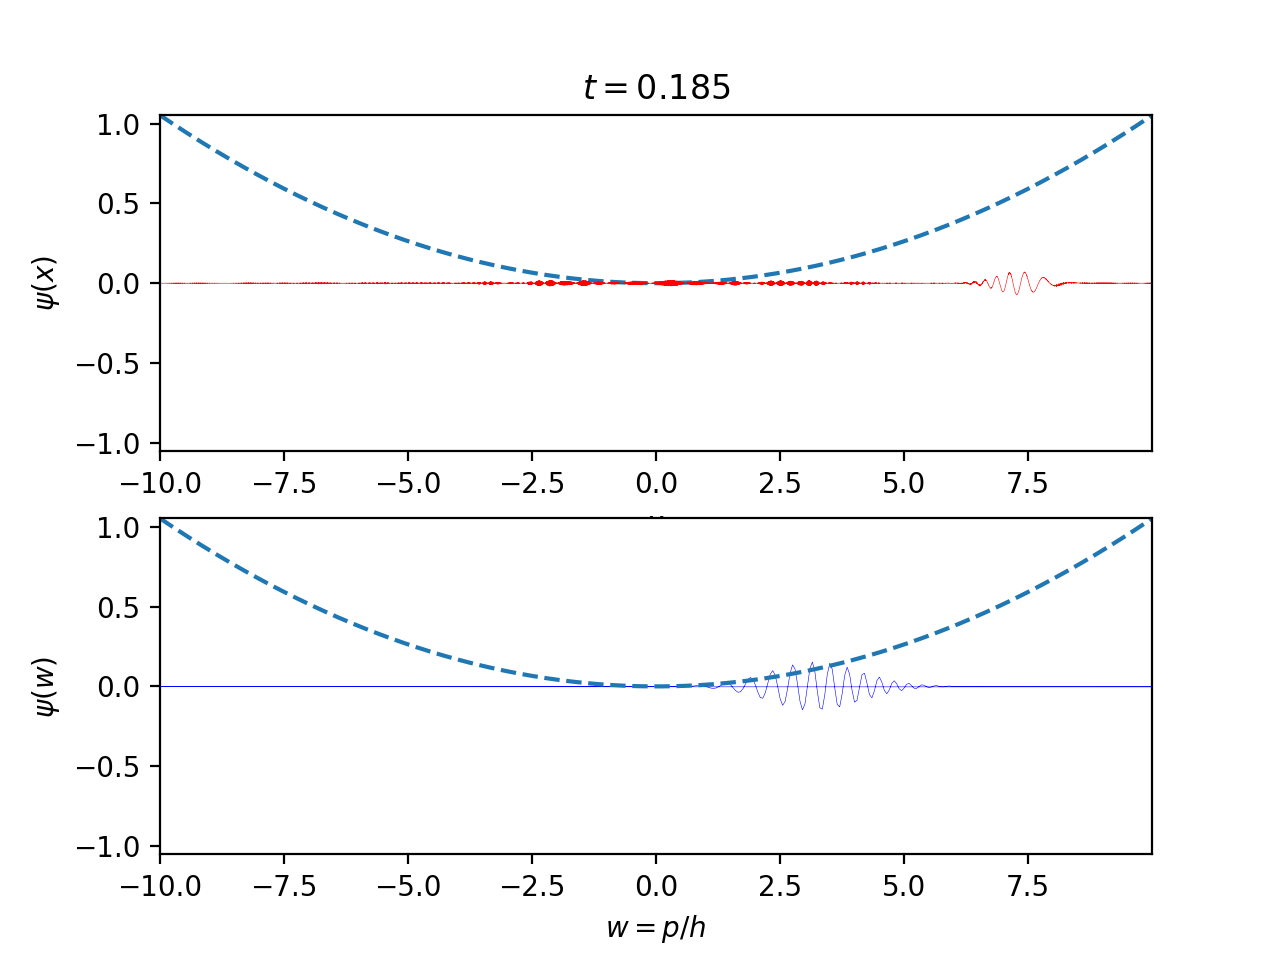

In [48]:
print(max(sol.y[:,0])/max(F[:,0]).real)
%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(2,1)

limit = 2.5*max(F[:,0])
scaler = 1/(max(V)/limit)

ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(-limit,limit)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\psi(x)$')

ax2.set_xlim(x[0], x[-1])
ax2.set_ylim(-limit, limit)
ax2.set_xlabel('$w=p/h$')
ax2.set_ylabel('$\psi(w)$')

title = ax1.set_title('The Quantum Harmonic Osciallator')

line1, = ax1.plot([], [], ls="--")
line2, = ax1.plot([], [],color='red', lw=.2)
line3, = ax2.plot([], [],color='blue', lw=.2)
line4, = ax2.plot([], [], ls="--")

def init():
    line1.set_data(x, V*scaler)
    line4.set_data(x, V*scaler)
    return line1,line4


def animate(i):
    line2.set_data(x, sol.y[:,i])
    line3.set_data(w, F[:,i])
    title.set_text('$t = {0:1.3f}$'.format(sol.t[i]))
    return line2,line3

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sol.t), interval=50, blit=True)    
plt.show()

#### Step Potential & Quantum Tunnelling

In [49]:
h = 0.005
x = np.arange(0, 10, h)
size = x.size

LO = scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(size, size)) / h**2

hbar = 1 
m=1

x_Vmin = 5         # center of V(x)
T      = 1  

omega = 2 * np.pi / T
k = omega**2 * m
V = np.zeros(size)
V[int(V.size/2):] = x_Vmin*250

def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * LO.dot(psi) + V / hbar * psi)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2   # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sigma=0.5
x0 = 3.0
kx = 50
A = 1.0 / (sigma * np.sqrt(np.pi))
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)



# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval)

<IPython.core.display.Javascript object>


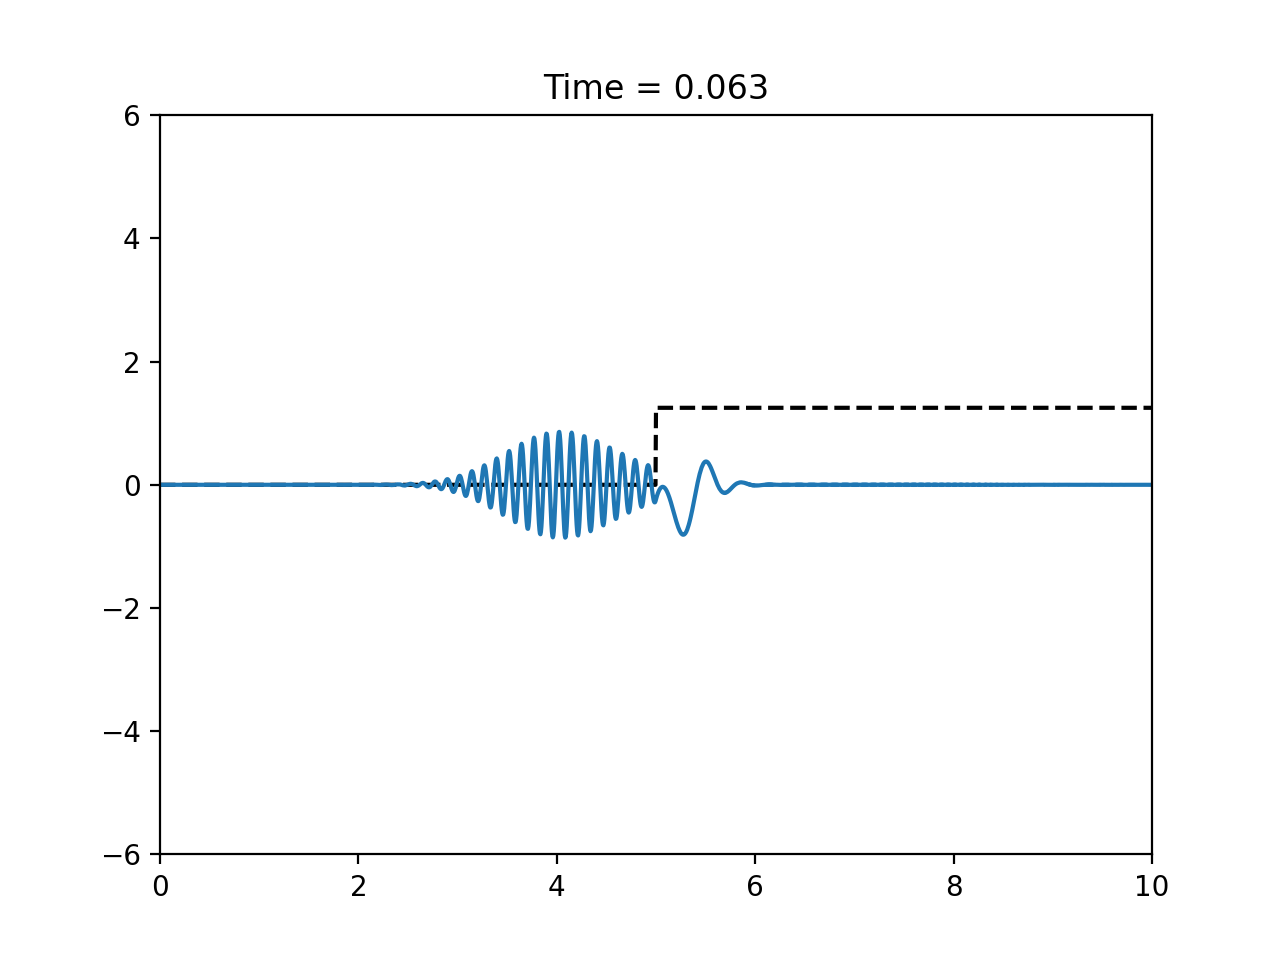

In [50]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (sol.y[:,i]).real)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


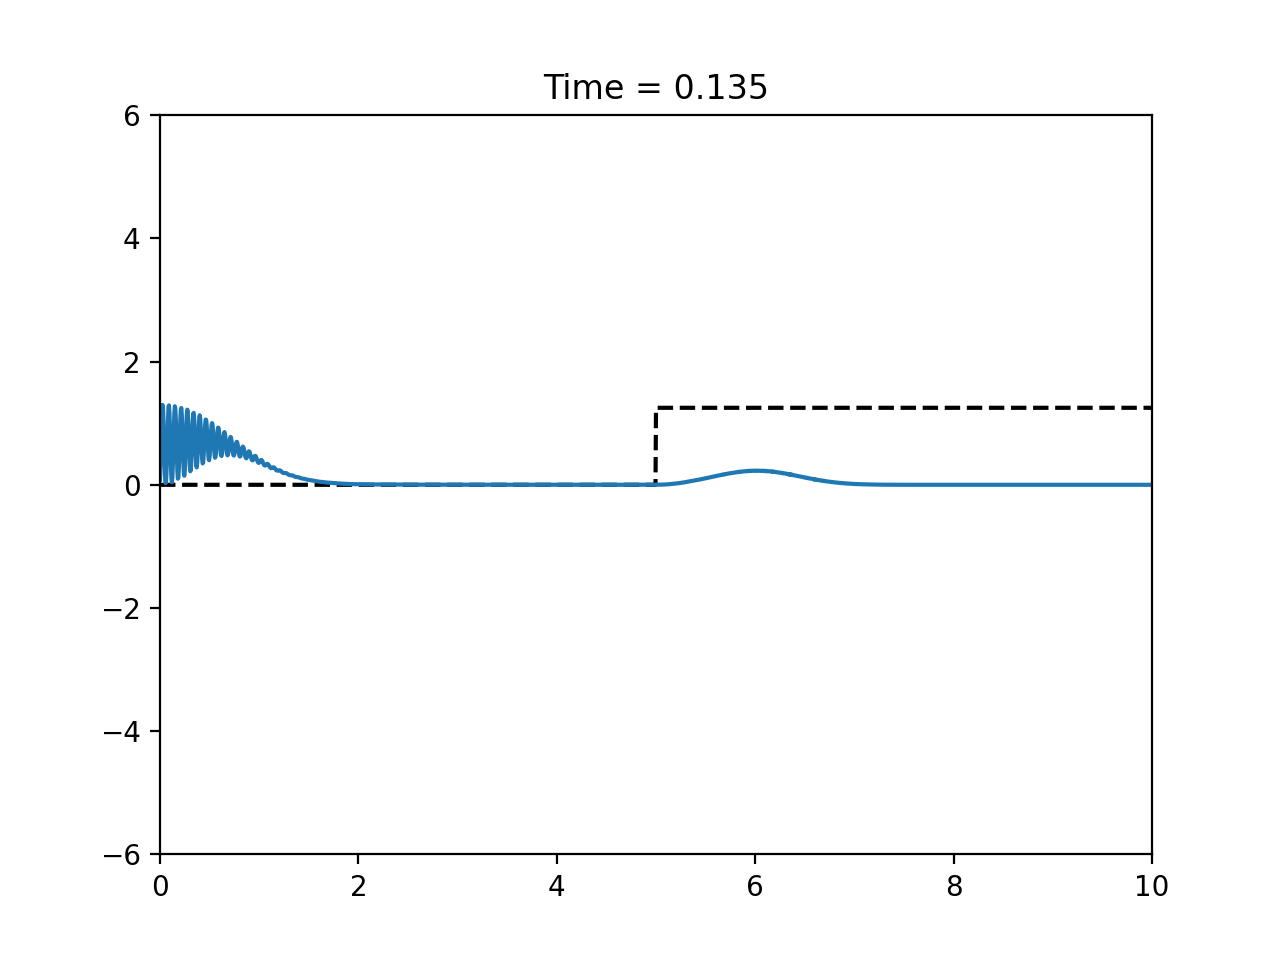

In [51]:
%matplotlib notebook

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 6)
title = ax1.set_title('')
line1, = ax1.plot([], [], "k--")
line2, = ax1.plot([], [])


def init():
    line1.set_data(x, V * 0.001)
    return line1,


def animate(i):
    line2.set_data(x, (np.abs(sol.y[:,i]))**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


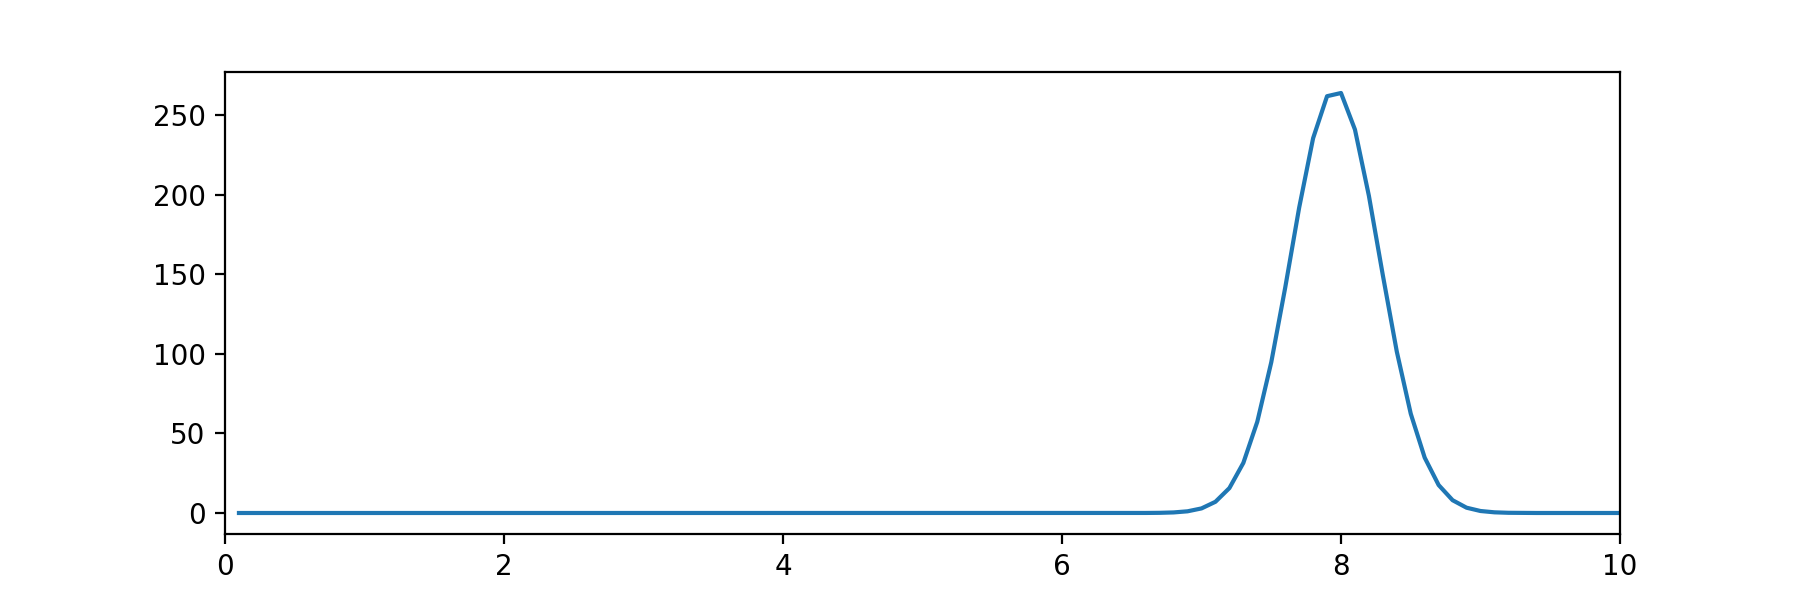

In [52]:
F = fftpack.fft(sol.y[:,0])
w = fftfreq(size, h)

indices = w > 0 # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 10)

plt.show()